<a href="https://colab.research.google.com/github/joshipj22/Assesment_Series_Case_Study_boosting/blob/main/L8_Boosting_and_other_ensemble_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Xgboost

1. Regularization → Adds L1 & L2 penalties on leaf weights (better overfitting control).

2. Second-order optimization → Uses both gradients & Hessians (faster & more accurate).

3. Sparsity-aware → Handles missing values & sparse features natively.

4. Subsampling → Supports both row & column subsampling (like Random Forest).

5. Parallel & scalable → Histogram-based split finding, cache-aware, out-of-core support.

6. Tree growth strategy → Loss-guided, depth-first growth instead of level-wise.

7. Built-in CV & early stopping → Direct support for model tuning inside training.

| Feature             | Traditional GBDT      | XGBoost                                       |
| ------------------- | --------------------- | --------------------------------------------- |
| Optimization        | First-order gradients | Second-order (gradient + Hessian)             |
| Regularization      | None / minimal        | L1 + L2 on leaf weights                       |
| Missing values      | Must impute           | Handles natively (sparsity-aware)             |
| Tree growth         | Level-wise            | Loss-guided depth-wise                        |
| Subsampling         | Rows only             | Rows + Columns                                |
| Speed               | Slower, sequential    | Parallel + cache-aware + histogram-based      |
| Overfitting control | Limited               | Regularization + subsampling + early stopping |
| Built-in CV         | No                    | Yes                                           |


Research Paper: https://www.kdd.org/kdd2016/papers/files/rfp0697-chenAemb.pdf

XGBoost doc: https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

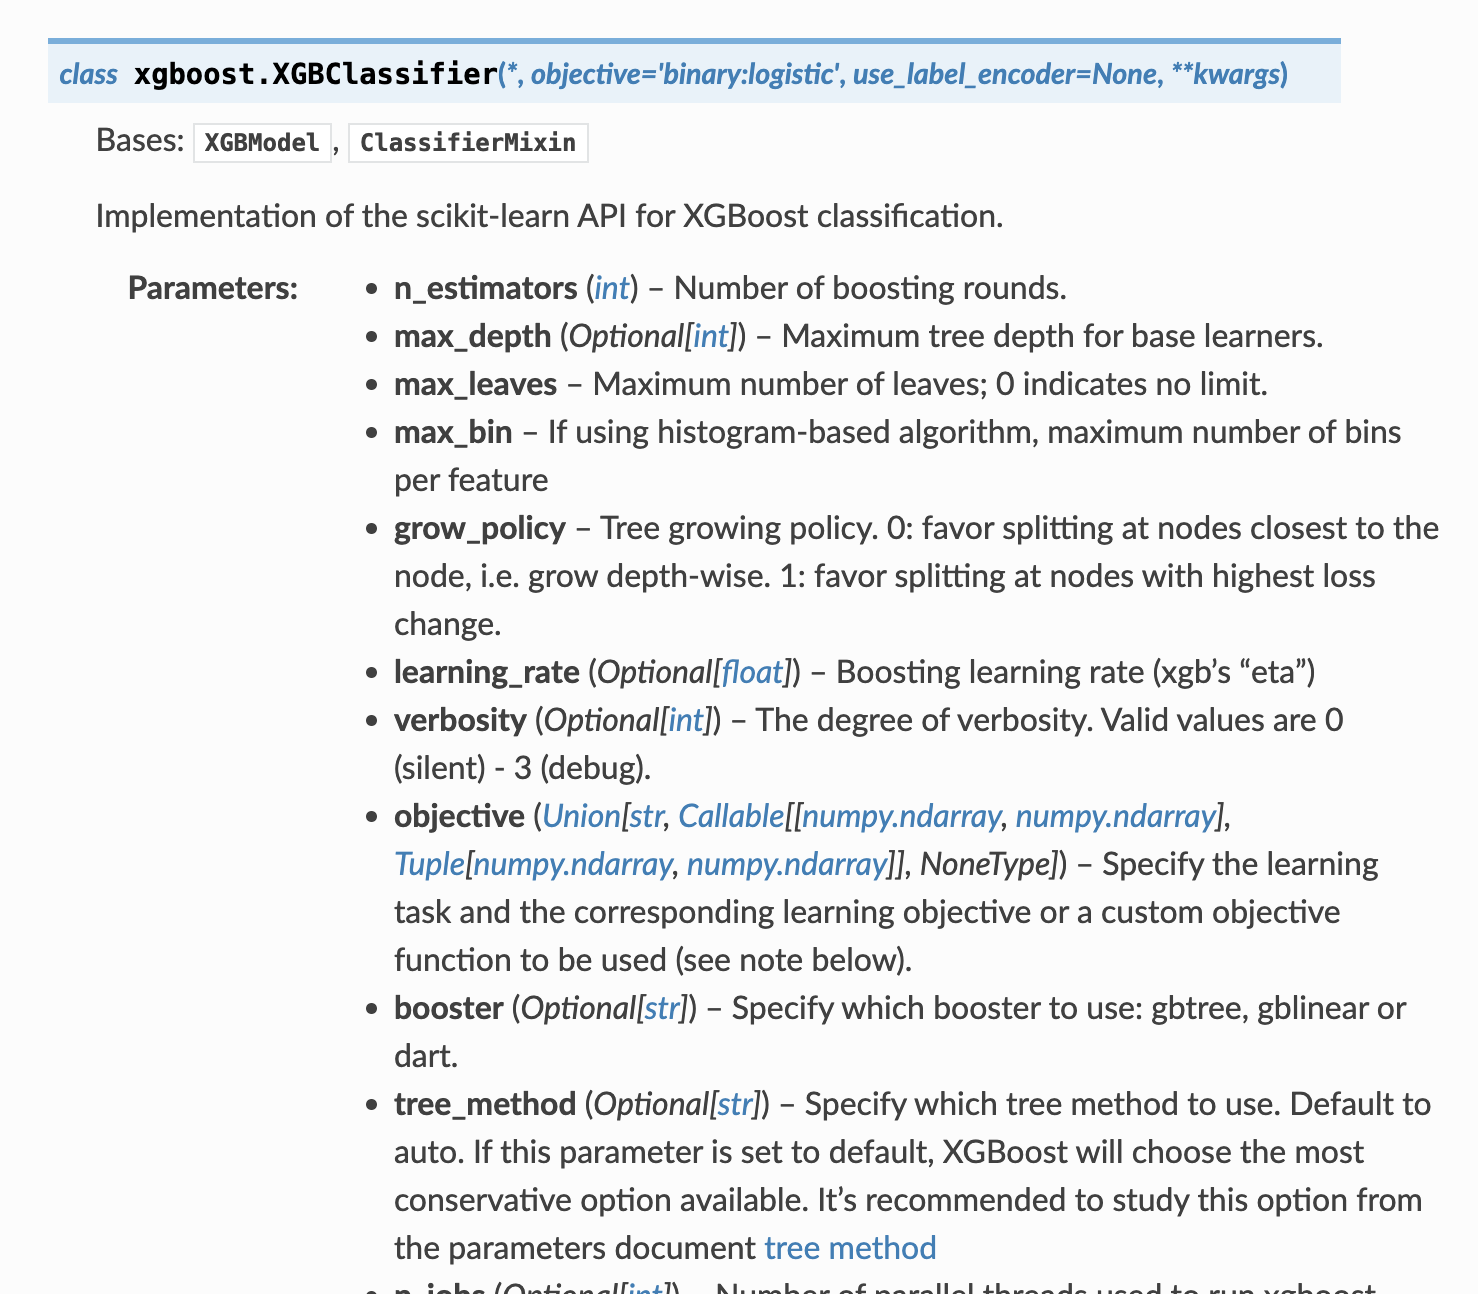

In [ ]:
import pickle
import pandas as pd

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 3.49MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 61.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 70.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 119MB/s]


In [ ]:

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }

xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)

In [ ]:
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)


start = dt.datetime.now()
random_search.fit(X_train, y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = random_search.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'subsample': 1.0, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0} Mean_score: 0.9544647387113141 Rank: 4
Parameters:{'subsample': 0.6, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 1.0} Mean_score: 0.9334728564180619 Rank: 8
Parameters:{'subsample': 0.6, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 1.0} Mean_score: 0.9614408929477424 Rank: 3
Parameters:{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0} Mean_score: 0.9491374936580416 Rank: 7
Parameters:{'subsample': 0.6, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8} Mean_score: 0.9244672754946728 Rank: 10
Parameters:{'subsample': 1.0, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8} Mean_score: 0.9295408422120751 Rank: 9
Parameters:{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:01:30.041763


In [ ]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=20, ...)


In [ ]:
xgb = random_search.best_estimator_

xgb.fit(X_train, y_train)

print("Model acc",xgb.score(X_test, y_test))

Model acc 0.9794572660410855


## RandomSearchCV

Goal: Hyperparameter tuning.

How it works:

- Takes a set of hyperparameter ranges (e.g., max_depth, learning_rate, n_estimators etc.).

- Randomly samples a fixed number of parameter combinations.

- For each combination, it uses cross validation (K-fold) to evaluate model performance.

- Selects the hyperparameters that give the best performance.

Level: Works outside the model — wrapper around training.

-----

## Cross validation inside XGBoost (xgb.cv)

Goal: Evaluate a given set of hyperparameters to see how well they generalize.

How it works:

- Takes a DMatrix and a fixed set of parameters (e.g., max_depth=6, eta=0.1).

- Splits the data into K folds.

- For each boosting round, trains on K-1 folds and evaluates on the held-out fold.

- Reports metrics like accuracy, AUC, or logloss at each boosting iteration.

- Can do early stopping (stop training when validation error stops improving).

Level: Works inside XGBoost training.

## LightGBM

| Feature           | XGBoost                   | LightGBM                                         |
| ----------------- | ------------------------- | ------------------------------------------------ |
| Tree Growth       | Level-wise (balanced)     | Leaf-wise (best-first, deeper)                   |
| Split Finding     | Exact / Histogram         | Histogram + efficient bundling                   |
| Data Reduction    | None (uses all samples)   | GOSS (keeps hard samples, downsamples easy ones) |
| Feature Reduction | None                      | EFB (bundles sparse features)                    |
| Speed             | Fast vs. traditional GBDT | Even faster, especially on large/high-dim data   |
| Memory Usage      | Higher                    | Lower (bundling + sampling)                      |


Research Paper: https://proceedings.neurips.cc/paper_files/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf

In [ ]:
import pickle

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 77.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 5.72MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 5.05MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 11.9MB/s]


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#Refer: https://lightgbm.readthedocs.io/en/latest/Parameters.html
import datetime as dt
gridParams = {
    'learning_rate': [0.1, 0.3, 0.5],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['multi_error'],
    }

clf = lgb.LGBMClassifier(num_classes=20)
random_cv = RandomizedSearchCV(clf,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10)

In [ ]:
start = dt.datetime.now()
random_cv.fit(X_train,y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [Info] Start training from score -3.011585
[LightGBM] [Info] Start training from score -2.972414
[LightGBM] [Info] Start training from score -2.988654
[LightGBM] [Info] Start training from score -3.021948
[LightGBM] [Info] Start training from score -2.962550
[Li

In [ ]:
res = random_cv.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 6, 'learning_rate': 0.5, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.1041349568746829 Rank: 10
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9600456621004566 Rank: 5
Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.13051750380517502 Rank: 9
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9628361237950278 Rank: 3
Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'boosting_type': 

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:01:19.871706


In [ ]:
print(random_cv.best_estimator_)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=5,
               metric='multi_error', num_classes=20, objective='multiclass',
               subsample=0.7)


In [ ]:
lgb = random_cv.best_estimator_

lgb.fit(X_train, y_train)

print("Model acc",lgb.score(X_test, y_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [Info] Start training from score -3.011585
[LightGBM] [Info] Start training from score -2.972414
[LightGBM] [Info] Start training from score -2.988654
[LightGBM] [Info] Start training from score -3.021948
[LightGBM] [Info] Start training from score -2.962550
[LightGBM] [Info] Start training from score -3.019347
[LightGBM]

## Stacking

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# ------------------------
# Generate synthetic binary classification dataset
# ------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Original Train Shape:", X_train.shape)
print("Original Test Shape :", X_test.shape)

# ------------------------
# Define base models
# ------------------------
base_models = [
    ('lr', LogisticRegression(max_iter=500)),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, random_state=42))
]

# ------------------------
# Meta-model (final estimator)
# ------------------------
meta_model = LogisticRegression(max_iter=500)

# ------------------------
# Stacking Classifier (with passthrough)
# ------------------------
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    stack_method='predict_proba',
    passthrough=True
)

# Train stacking
stacking_clf.fit(X_train, y_train)

# ------------------------
# Check shapes at each stage
# ------------------------
print("\n--- Shapes of meta-features ---")

for name, model in stacking_clf.named_estimators_.items():
    proba = model.predict_proba(X_train)
    print(f"{name} output shape: {proba.shape}")

# What stacking actually passes to meta-model
meta_features = np.column_stack([
    cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")[:, 1]
    for _, model in base_models
])

print("Meta-features shape (train, only from base models):", meta_features.shape)
print("Meta-features shape (train, with passthrough):", (X_train.shape[0], X_train.shape[1] + meta_features.shape[1]))

# Predict
y_pred = stacking_clf.predict(X_test)
print("\nStacking Ensemble Accuracy:", accuracy_score(y_test, y_pred))


Original Train Shape: (700, 20)
Original Test Shape : (300, 20)

--- Shapes of meta-features ---
lr output shape: (700, 2)
rf output shape: (700, 2)
gb output shape: (700, 2)
Meta-features shape (train, only from base models): (700, 3)
Meta-features shape (train, with passthrough): (700, 23)

Stacking Ensemble Accuracy: 0.9133333333333333


In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.470848,-0.360450,-0.591602,-0.728228,0.941690,1.065964,0.017832,-0.596184,1.840712,-1.497093,-1.202672,-0.603968,2.899256,0.037567,-1.249523,0.257963,0.416628,1.408208,-1.838041,-0.833142
1,4.513369,-2.227103,-1.140747,2.018263,-2.238358,-0.497370,0.714550,0.938883,-2.395169,0.159837,0.133942,1.461499,3.954171,0.309054,0.538184,-7.157865,-4.532216,-0.081800,-9.325362,0.574386
2,-2.355643,2.218601,-1.603269,0.873394,0.401483,0.717264,-0.859399,-1.042190,-2.175965,0.980231,1.498546,0.544434,-2.466258,-0.470256,0.073018,-2.203531,-2.299263,-1.742761,-0.271579,-0.359285
3,-1.596198,-0.857427,1.772434,-0.639361,1.419409,-0.438525,0.281949,2.345145,1.006230,0.389135,0.238566,-1.025051,-2.422975,1.579807,-0.300713,4.267120,2.893775,1.236697,6.034785,-0.045711
4,2.840049,-2.489600,-0.844902,-1.594362,-4.688517,0.459637,0.913607,-1.143505,1.263937,-2.040928,0.675664,4.176424,1.341742,0.133565,1.743819,1.531188,2.269808,0.053489,-3.151109,1.603702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.952534,0.238036,0.331327,0.120452,3.539113,-0.556466,0.517210,2.324479,-0.123064,-2.143993,1.221166,-2.233344,-1.424993,0.443893,-2.239507,1.650853,2.296884,0.438294,1.705011,-1.504149
996,-3.434088,-1.020016,-0.726931,-1.787934,-3.247447,1.439954,1.075627,-2.812310,2.527895,-6.569889,1.068642,2.058341,-2.655348,0.566760,3.414485,5.391528,0.744789,-3.919345,-5.365949,0.725590
997,-0.015335,1.883507,3.221682,2.878762,-3.854459,-1.862864,-0.534772,-6.446245,0.976906,0.268957,-1.636302,0.306705,4.747956,-0.484956,7.601766,1.039739,-0.107586,-0.789566,0.282480,0.825853
998,1.285071,1.618508,-1.700678,1.051307,-2.025566,-0.375928,0.261185,1.514845,-2.452698,0.811538,-0.571903,-1.600277,3.054941,0.791745,0.982096,-2.942005,-4.929617,1.660500,-2.192116,0.906871


## Cascading

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(X)
X.columns = X.columns.astype(str)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial shape:", X_train.shape)

# ----------------------------
# Stage 1: Logistic Regression
# ----------------------------
model1 = LogisticRegression(max_iter=2000)
model1.fit(X_train, y_train)

train_probs1 = model1.predict_proba(X_train)[:, 1]
test_probs1 = model1.predict_proba(X_test)[:, 1]

X_train_stage1 = X_train.copy()
X_test_stage1 = X_test.copy()
X_train_stage1["logit_prob"] = train_probs1
X_test_stage1["logit_prob"] = test_probs1

print("After Stage 1 (Logistic Regression):", X_train_stage1.shape)

# ----------------------------
# Stage 2: Random Forest
# ----------------------------
model2 = RandomForestClassifier(n_estimators=200, random_state=42)
model2.fit(X_train_stage1, y_train)

train_probs2 = model2.predict_proba(X_train_stage1)[:, 1]
test_probs2 = model2.predict_proba(X_test_stage1)[:, 1]

X_train_stage2 = X_train_stage1.copy()
X_test_stage2 = X_test_stage1.copy()
X_train_stage2["rf_prob"] = train_probs2
X_test_stage2["rf_prob"] = test_probs2

print("After Stage 2 (Random Forest):", X_train_stage2.shape)

# ----------------------------
# Stage 3: Gradient Boosting
# ----------------------------
model3 = GradientBoostingClassifier(n_estimators=200, random_state=42)
model3.fit(X_train_stage2, y_train)

train_probs3 = model3.predict_proba(X_train_stage2)[:, 1]
test_probs3 = model3.predict_proba(X_test_stage2)[:, 1]

X_train_stage3 = X_train_stage2.copy()
X_test_stage3 = X_test_stage2.copy()
X_train_stage3["gb_prob"] = train_probs3
X_test_stage3["gb_prob"] = test_probs3

print("After Stage 3 (Gradient Boosting):", X_train_stage3.shape)

# ----------------------------
# Final Prediction from Stage 3
# ----------------------------
y_pred_final = model3.predict(X_test_stage2)
final_acc = accuracy_score(y_test, y_pred_final)

print("\nFinal Cascaded Model Accuracy:", final_acc)


Initial shape: (455, 30)
After Stage 1 (Logistic Regression): (455, 31)
After Stage 2 (Random Forest): (455, 32)
After Stage 3 (Gradient Boosting): (455, 33)

Final Cascaded Model Accuracy: 0.9824561403508771
